<a href="https://colab.research.google.com/github/Khushal21csu188/RLLAB-SEM-5/blob/main/RL%20PRACTICAL-3%20Exploration%2Cgreedy%2Cepsilon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**USING EXPLORATION METHOD**

Restaurant A:
   - Total Cumulative Reward: 4140.27
   - Average Reward: 4.49
   - Number of Selections: 922

Restaurant B:
   - Total Cumulative Reward: 83.86
   - Average Reward: 3.81
   - Number of Selections: 22

Restaurant C:
   - Total Cumulative Reward: 60.18
   - Average Reward: 4.01
   - Number of Selections: 15

Restaurant D:
   - Total Cumulative Reward: 75.82
   - Average Reward: 4.21
   - Number of Selections: 18

Restaurant E:
   - Total Cumulative Reward: 90.61
   - Average Reward: 3.94
   - Number of Selections: 23

Total Cumulative Reward Across All Restaurants: 4450.75

Final Decision:
The best restaurant to visit is Restaurant A based on average reward.


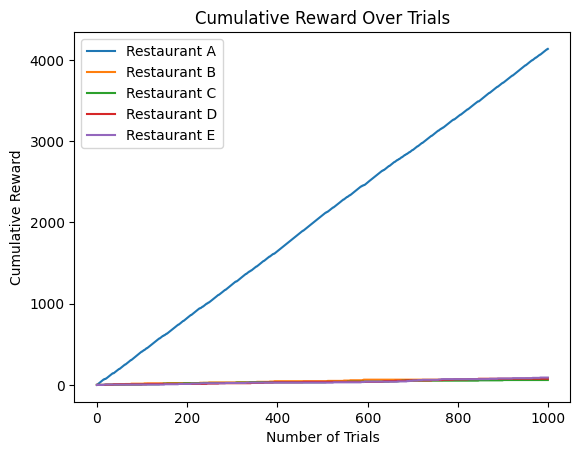

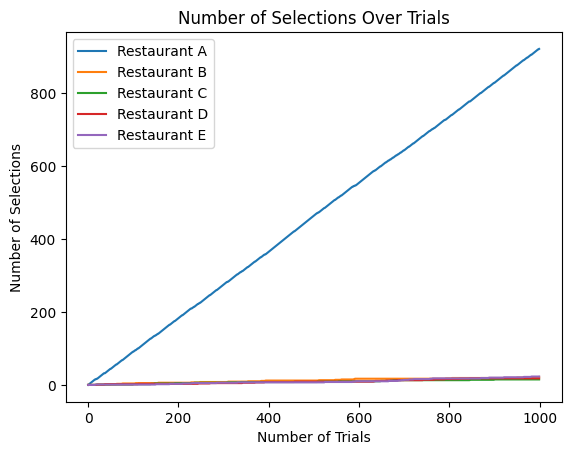

In [ ]:
import random
import matplotlib.pyplot as plt

# Define the list of restaurants with their quality (reward).
restaurants = {
    "Restaurant A": 4.5,
    "Restaurant B": 3.8,
    "Restaurant C": 4.0,
    "Restaurant D": 4.2,
    "Restaurant E": 3.9,
}

# Initialize variables for tracking rewards and restaurant selections.
total_rewards = {restaurant: 0.0 for restaurant in restaurants}
num_selections = {restaurant: 0 for restaurant in restaurants}
num_trials = 1000

# Set the epsilon parameter (controls exploration vs. exploitation).
epsilon = 0.1

# Initialize lists to store data for plotting.
cumulative_rewards_data = {restaurant: [] for restaurant in restaurants}
num_selections_data = {restaurant: [] for restaurant in restaurants}

# Initialize a variable to track the total cumulative reward across all restaurants.
total_cumulative_reward = 0.0

# Perform 1000 trials to decide which restaurant to visit.
for trial in range(num_trials):
    for restaurant in restaurants:
        cumulative_rewards_data[restaurant].append(total_rewards[restaurant])
        num_selections_data[restaurant].append(num_selections[restaurant])

    if random.random() < epsilon:
        # Exploration: Choose a random restaurant with probability epsilon.
        selected_restaurant = random.choice(list(restaurants.keys()))
    else:
        # Exploitation: Choose the restaurant with the highest estimated reward.
        selected_restaurant = max(restaurants, key=lambda r: total_rewards[r] / max(1, num_selections[r]))

    # Simulate visiting the selected restaurant and update rewards.
    reward = random.gauss(restaurants[selected_restaurant], 0.2)  # Simulated reward with some noise.
    total_rewards[selected_restaurant] += reward
    num_selections[selected_restaurant] += 1

    # Update the total cumulative reward.
    total_cumulative_reward += reward

# Calculate the average reward for each restaurant.
average_rewards = {restaurant: total_rewards[restaurant] / max(1, num_selections[restaurant]) for restaurant in restaurants}

# Print the results.
for restaurant in restaurants:
    print(f"{restaurant}:")
    print(f"   - Total Cumulative Reward: {total_rewards[restaurant]:.2f}")
    print(f"   - Average Reward: {average_rewards[restaurant]:.2f}")
    print(f"   - Number of Selections: {num_selections[restaurant]}")
    print()

# Print the total cumulative reward across all restaurants.
print(f"Total Cumulative Reward Across All Restaurants: {total_cumulative_reward:.2f}")

# Determine the final decision based on the estimated average rewards.
final_decision = max(restaurants, key=lambda r: average_rewards[r])

print("\nFinal Decision:")
print(f"The best restaurant to visit is {final_decision} based on average reward.")

# Plot the cumulative rewards for each restaurant.
for restaurant in restaurants:
    plt.plot(range(num_trials), cumulative_rewards_data[restaurant], label=restaurant)

plt.xlabel("Number of Trials")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over Trials")
plt.legend()
plt.show()

# Plot the number of times each restaurant is selected.
for restaurant in restaurants:
    plt.plot(range(num_trials), num_selections_data[restaurant], label=restaurant)

plt.xlabel("Number of Trials")
plt.ylabel("Number of Selections")
plt.title("Number of Selections Over Trials")
plt.legend()
plt.show()


**USING OPTIMISTIC GREEDY METHOD**

Restaurant A:
   - Total Cumulative Reward: -0.14
   - Average Reward: -0.14
   - Number of Selections: 1

Restaurant B:
   - Total Cumulative Reward: -0.30
   - Average Reward: -0.30
   - Number of Selections: 1

Restaurant C:
   - Total Cumulative Reward: -0.33
   - Average Reward: -0.11
   - Number of Selections: 3

Restaurant D:
   - Total Cumulative Reward: -0.13
   - Average Reward: -0.13
   - Number of Selections: 1

Restaurant E:
   - Total Cumulative Reward: 8.21
   - Average Reward: 0.01
   - Number of Selections: 994


Final Decision:
The best restaurant to visit is Restaurant E based on average reward.


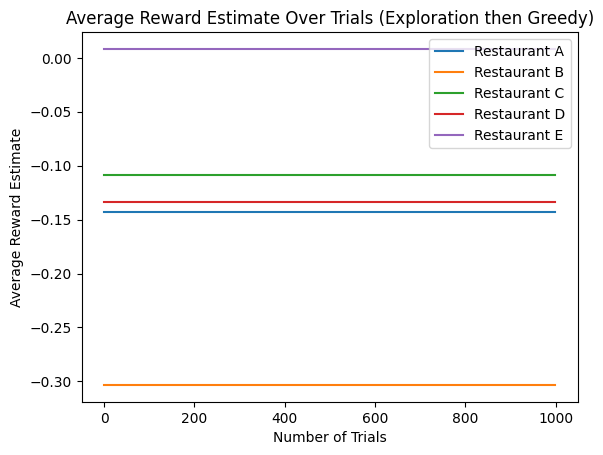

In [ ]:
import random
import matplotlib.pyplot as plt

# Define the list of restaurants with their initial estimates (reward).
restaurants = {
    "Restaurant A": 0.0,
    "Restaurant B": 0.0,
    "Restaurant C": 0.0,
    "Restaurant D": 0.0,
    "Restaurant E": 0.0,
}

# Initialize variables for tracking rewards and restaurant selections.
total_rewards = {restaurant: 0.0 for restaurant in restaurants}
num_selections = {restaurant: 0 for restaurant in restaurants}
num_trials = 1000

# Ensure each restaurant is explored at least once.
for restaurant in restaurants:
    # Simulate visiting the selected restaurant and update rewards.
    reward = random.gauss(restaurants[restaurant], 0.2)  # Simulated reward with some noise.
    total_rewards[restaurant] += reward
    num_selections[restaurant] += 1

# Perform additional trials using greedy approach.
for trial in range(len(restaurants), num_trials):
    selected_restaurant = max(restaurants, key=lambda r: total_rewards[r] / max(1, num_selections[r]))

    # Simulate visiting the selected restaurant and update rewards.
    reward = random.gauss(restaurants[selected_restaurant], 0.2)  # Simulated reward with some noise.
    total_rewards[selected_restaurant] += reward
    num_selections[selected_restaurant] += 1

# Calculate the average reward for each restaurant.
average_rewards = {restaurant: total_rewards[restaurant] / max(1, num_selections[restaurant]) for restaurant in restaurants}

# Print the results.
for restaurant in restaurants:
    print(f"{restaurant}:")
    print(f"   - Total Cumulative Reward: {total_rewards[restaurant]:.2f}")
    print(f"   - Average Reward: {average_rewards[restaurant]:.2f}")
    print(f"   - Number of Selections: {num_selections[restaurant]}")
    print()

# Determine the final decision based on the estimated average rewards.
final_decision = max(restaurants, key=lambda r: average_rewards[r])

print("\nFinal Decision:")
print(f"The best restaurant to visit is {final_decision} based on average reward.")

# Plot the cumulative rewards for each restaurant.
for restaurant in restaurants:
    plt.plot(range(num_trials), [total_rewards[restaurant] / max(1, num_selections[restaurant])] * num_trials, label=restaurant)

plt.xlabel("Number of Trials")
plt.ylabel("Average Reward Estimate")
plt.title("Average Reward Estimate Over Trials (Exploration then Greedy)")
plt.legend()
plt.show()


**USING EPSILON GREEDY METHOD**

Restaurant A:
   - Total Cumulative Reward: 2643.70
   - Average Reward: 4.51
   - Number of Selections: 586

Restaurant B:
   - Total Cumulative Reward: 349.28
   - Average Reward: 3.80
   - Number of Selections: 92

Restaurant C:
   - Total Cumulative Reward: 448.77
   - Average Reward: 4.01
   - Number of Selections: 112

Restaurant D:
   - Total Cumulative Reward: 401.66
   - Average Reward: 4.23
   - Number of Selections: 95

Restaurant E:
   - Total Cumulative Reward: 447.79
   - Average Reward: 3.89
   - Number of Selections: 115


Final Decision:
The best restaurant to visit is Restaurant A based on average reward.


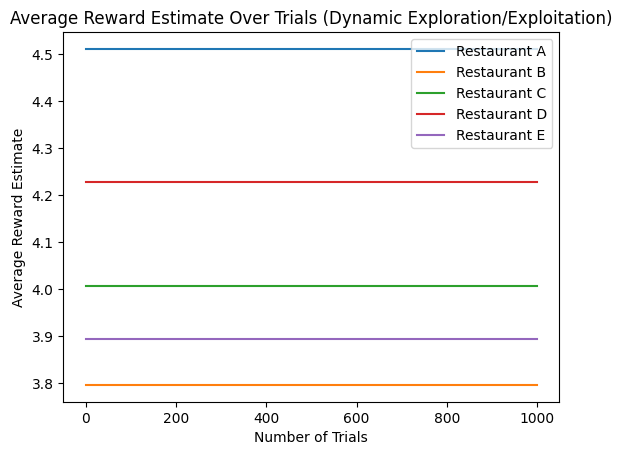

In [ ]:
import random
import matplotlib.pyplot as plt

# Define the list of restaurants with their quality (reward).
restaurants = {
    "Restaurant A": 4.5,
    "Restaurant B": 3.8,
    "Restaurant C": 4.0,
    "Restaurant D": 4.2,
    "Restaurant E": 3.9,
}

# Initialize variables for tracking rewards and restaurant selections.
total_rewards = {restaurant: 0.0 for restaurant in restaurants}
num_selections = {restaurant: 0 for restaurant in restaurants}
num_trials = 1000

# Perform trials to decide which restaurant to visit.
for trial in range(num_trials):
    exploration_prob = random.uniform(0, 1)  # Generate a random probability between 0 and 1.

    if exploration_prob <= 0.5:  # Example: Explore with a 50% probability.
        # Exploration: Choose a random restaurant.
        selected_restaurant = random.choice(list(restaurants.keys()))
    else:
        # Exploitation: Choose the restaurant with the highest estimated reward.
        selected_restaurant = max(restaurants, key=lambda r: total_rewards[r] / max(1, num_selections[r]))

    # Simulate visiting the selected restaurant and update rewards.
    reward = random.gauss(restaurants[selected_restaurant], 0.2)  # Simulated reward with some noise.
    total_rewards[selected_restaurant] += reward
    num_selections[selected_restaurant] += 1

# Calculate the average reward for each restaurant.
average_rewards = {restaurant: total_rewards[restaurant] / max(1, num_selections[restaurant]) for restaurant in restaurants}

# Print the results.
for restaurant in restaurants:
    print(f"{restaurant}:")
    print(f"   - Total Cumulative Reward: {total_rewards[restaurant]:.2f}")
    print(f"   - Average Reward: {average_rewards[restaurant]:.2f}")
    print(f"   - Number of Selections: {num_selections[restaurant]}")
    print()

# Determine the final decision based on the estimated average rewards.
final_decision = max(restaurants, key=lambda r: average_rewards[r])

print("\nFinal Decision:")
print(f"The best restaurant to visit is {final_decision} based on average reward.")

# Plot the cumulative rewards for each restaurant.
for restaurant in restaurants:
    plt.plot(range(num_trials), [total_rewards[restaurant] / max(1, num_selections[restaurant])] * num_trials, label=restaurant)

plt.xlabel("Number of Trials")
plt.ylabel("Average Reward Estimate")
plt.title("Average Reward Estimate Over Trials (Dynamic Exploration/Exploitation)")
plt.legend()
plt.show()
